# Hold Out and Cross Validation compared
The objective of this notebook is to illustrate the benefits of Cross Validation over Hold Out. 
1. In the first analysis we show how X Val estimates of accuracy are lower variance that Hold Out. This is done by repeating each analysis 100 times and plotting the results. 
2. In the second analysis we show how accuracy estimation varies with training set size. 

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
dtree = DecisionTreeClassifier(criterion='entropy')

In [2]:
bcDB = datasets.load_breast_cancer()
y = bcDB.target
X = bcDB.data

## Hold-Out Testing

In [3]:
reps = 100
ho = []
for i in range(reps):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=i)
    y_pred = dtree.fit(X_train, y_train).predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    ho.append(acc)

## X Val

In [4]:
xv = []
for i in range(reps):
    scores = cross_val_score(dtree, X, y, cv=10)
    xv.append(scores.mean())

Text(0.5, 1.0, 'Accuracy: Hold Out and X Val')

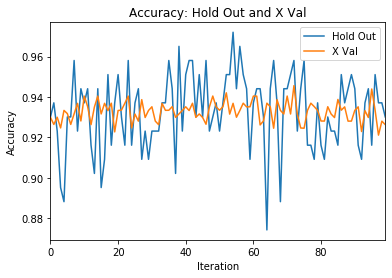

In [7]:
res = pd.DataFrame(ho, columns = ['Hold Out'])
res['X Val']=xv
%matplotlib inline
ax = res.plot()
ax.set_xlabel("Iteration")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy: Hold Out and X Val")

## Learning Curve
In the second analysis we show how accuracy estimation varies with training set size.   
We switch to the wine dataset because the effect is more evident there because it is a smaller dataset. 

In [8]:
wineDB = datasets.load_wine()
y = wineDB.target
X = wineDB.data
X.shape

(178, 13)

In [9]:
from statistics import mean
num = 30
ho_s = []
s_s = []
for i in range(1,num):
    s = i/num
    for j in range(500):
        ss =[]
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = s)
        y_pred = dtree.fit(X_train, y_train).predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        ss.append(acc)
    ho_s.append(mean(ss))
    s_s.append(s)

Text(0.5, 1.0, 'Accuracy: Train Set Size')

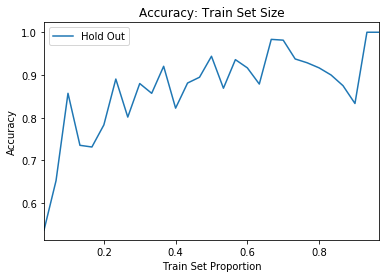

In [10]:
ho_s = pd.DataFrame(ho_s, index = s_s, columns = ['Hold Out'])
ax = ho_s.plot()
ax.set_xlabel("Train Set Proportion")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy: Train Set Size")